In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def myGaussianSmoothing(I, k, s):
    """
    Apply Gaussian smoothing to an image I with kernel size k and scaling parameter s (sigma).
    
    Parameters:
    - I: Input image
    - k: Kernel size (should be an odd number)
    - s: Standard deviation for the Gaussian kernel (sigma)
    
    Returns:
    - I_smooth: Smoothed image
    """
    # Ensure kernel size is odd
    if k % 2 == 0:
        raise ValueError("Kernel size should be an odd number")
    
    # Apply Gaussian Blur using OpenCV's GaussianBlur function
    I_smooth = cv2.GaussianBlur(I, (k, k), s)
    return I_smooth

In [3]:

def plot_images(original, smoothed_images, titles):
    """ Utility function to plot the original and smoothed images. """
    plt.figure(figsize=(12, 6))
    
    # Plot original image
    plt.subplot(2, len(smoothed_images)//2 + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot smoothed images
    for i, (img, title) in enumerate(zip(smoothed_images, titles)):
        plt.subplot(2, len(smoothed_images)//2 + 1, i + 2)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

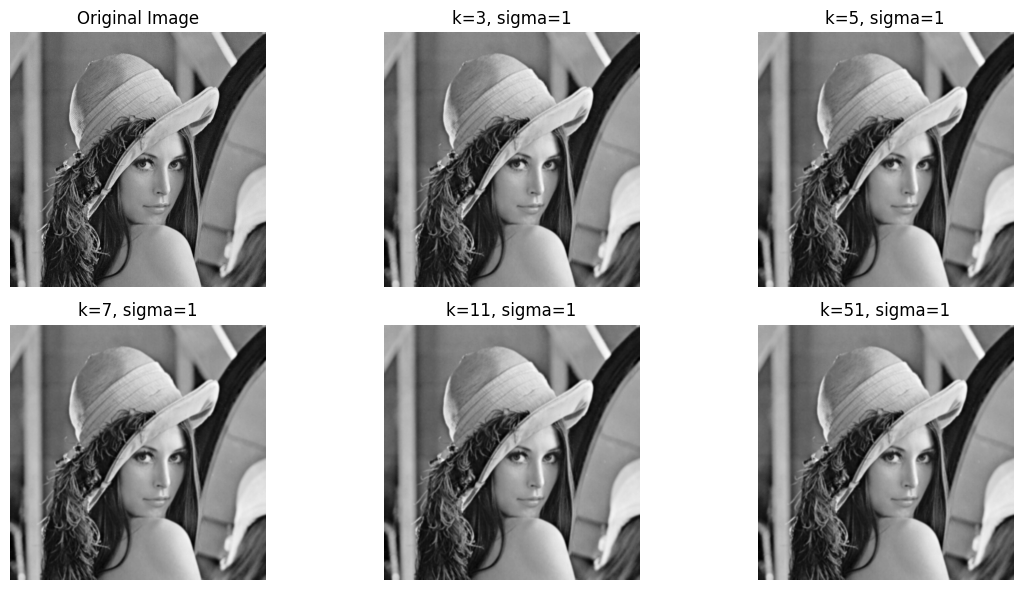

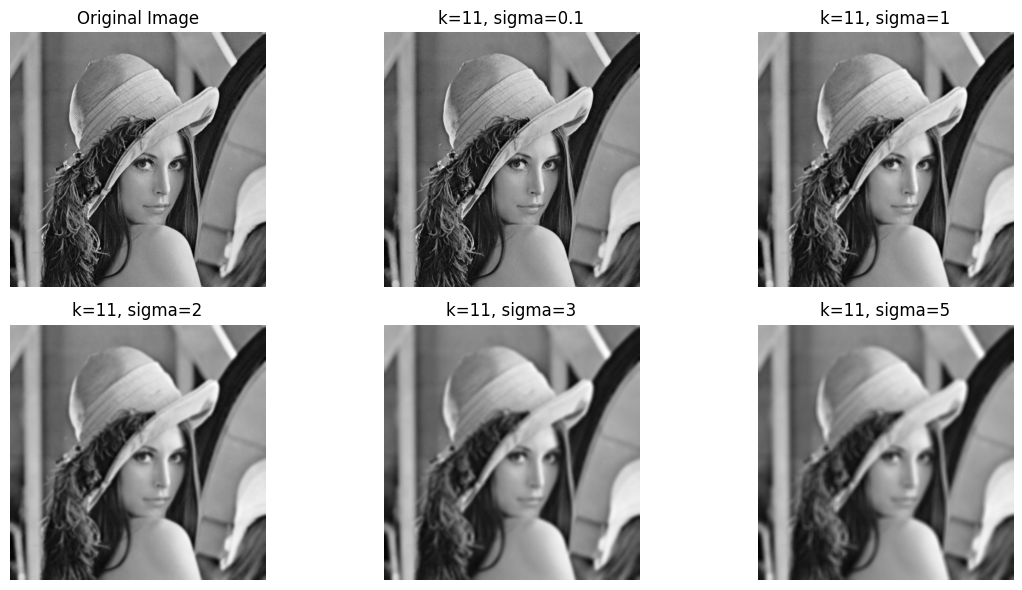

In [4]:
I = cv2.imread('./Lenna.png', cv2.IMREAD_GRAYSCALE)  # Load a grayscale image

# Part 1: Varying kernel size with fixed sigma
kernel_sizes = [3, 5, 7, 11, 51]
sigma = 1
smoothed_images_k = [myGaussianSmoothing(I, k, sigma) for k in kernel_sizes]
titles_k = [f"k={k}, sigma={sigma}" for k in kernel_sizes]

# Part 2: Varying sigma with fixed kernel size
kernel_size = 11
sigmas = [0.1, 1, 2, 3, 5]
smoothed_images_s = [myGaussianSmoothing(I, kernel_size, s) for s in sigmas]
titles_s = [f"k={kernel_size}, sigma={s}" for s in sigmas]

# Plot results for varying kernel sizes
plot_images(I, smoothed_images_k, titles_k)

# Plot results for varying sigma
plot_images(I, smoothed_images_s, titles_s)